In [1]:
import numpy as np

from dijkstra import Network

distance_matrix = np.array(
    [[0.0, 4.0, 0.0, 2.0, 0.0],
     [0.0, 0.0, 5.0, 0.0, 0.0],
     [0.0, 0.0, 0.0, 0.0, 3.0],
     [0.0, 1.0, 0.0, 0.0, 6.0],
     [0.0, 0.0, 0.0, 0.0, 0.0]]
)
node_names = list("ABCDE")

In [2]:
network = Network(distance_matrix,node_names)

In [3]:
import json
test = network.get_shortest_distances('A')
print(json.dumps(test,indent=2))

{
  "A": {
    "distance": 0,
    "route": [
      "A"
    ]
  },
  "B": {
    "distance": 3.0,
    "route": [
      "A",
      "D",
      "B"
    ]
  },
  "D": {
    "distance": 2.0,
    "route": [
      "A",
      "D"
    ]
  },
  "E": {
    "distance": 8.0,
    "route": [
      "A",
      "D",
      "E"
    ]
  },
  "C": {
    "distance": 8.0,
    "route": [
      "A",
      "D",
      "B",
      "C"
    ]
  }
}


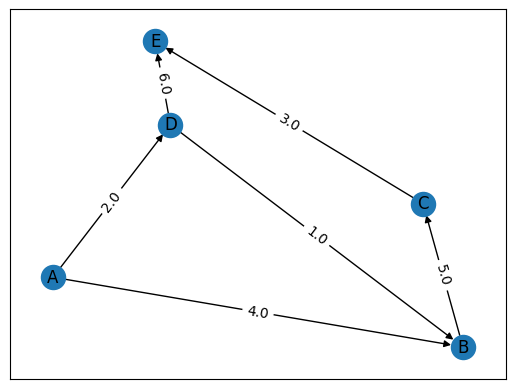

In [4]:
network.draw_graph()

In [5]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'Node from')

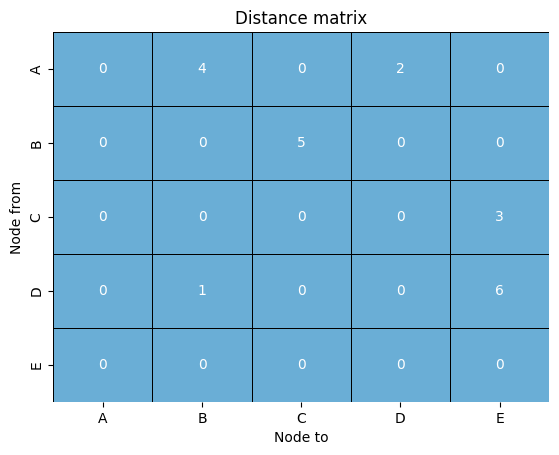

In [6]:
import matplotlib.pyplot as plt
ax = sns.heatmap(distance_matrix, xticklabels = node_names,yticklabels = node_names, annot=True, vmin = -1000, vmax = 1000, cbar=False, linecolor='black',linewidths = .5, cmap = 'Blues')
plt.title("Distance matrix")
plt.xlabel("Node to")
plt.ylabel("Node from")